<a href="https://colab.research.google.com/github/Tar-ive/STOCKS/blob/main/Stock_Screener.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install yfinance

In [3]:
import pandas as pd

def get_sp500_list():
    table = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    sp500 = table[0]
    return sp500[['Symbol', 'Security']]


In [6]:
import yfinance as yf

def fetch_financial_data(ticker):
    stock = yf.Ticker(ticker)
    hist = stock.history(period="1y")  # Historical data
    info = stock.info  # General stock info
    return hist, info


In [7]:
def is_criteria_met(info, hist):
    # Example criteria checks
    pe_ratio = info.get('trailingPE', 0) > 20
    yoy_growth = info.get('revenueGrowth', 0) > 0.2
    market_cap = info.get('marketCap', 0) > 100e9
    # Add more conditions as needed

    return pe_ratio and yoy_growth and market_cap

def screen_stocks(sp500):
    screened_stocks = []
    for ticker in sp500['Symbol']:
        hist, info = fetch_financial_data(ticker)
        if is_criteria_met(info, hist):
            screened_stocks.append(ticker)
    return screened_stocks


In [8]:
sp500_list = get_sp500_list()
screened_stocks = screen_stocks(sp500_list)
print(screened_stocks)


['LLY', 'INTU', 'META', 'NVDA', 'PGR', 'NOW']


In [28]:
screened_stocks

['LLY', 'INTU', 'META', 'NVDA', 'PGR', 'NOW']

In [9]:
data = screened_stocks

In [29]:
import yfinance as yf
import pandas as pd

def fetch_detailed_data(screened_stocks):
    stock_data = {}
    for ticker in screened_stocks:
        stock = yf.Ticker(ticker)
        # Fetching 5 years of daily data
        hist = stock.history(period="5y")
        # You can add more metrics if needed
        stock_data[ticker] = {
            'Open': hist['Open'].iloc[-1],
            'High': hist['High'].iloc[-1],
            'Low': hist['Low'].iloc[-1],
            'Close': hist['Close'].iloc[-1],
            'Volume': hist['Volume'].iloc[-1],
            'Historical Data': hist
        }
    return stock_data


In [30]:
def create_metrics_table(stock_data):
    data_for_table = {
        'Ticker': [],
        'Open': [],
        'Close': [],
        'High': [],
        'Low': [],
        'Volume': []
    }

    for ticker, data in stock_data.items():
        data_for_table['Ticker'].append(ticker)
        data_for_table['Open'].append(data['Open'])
        data_for_table['Close'].append(data['Close'])
        data_for_table['High'].append(data['High'])
        data_for_table['Low'].append(data['Low'])
        data_for_table['Volume'].append(data['Volume'])

    return pd.DataFrame(data_for_table)

# Assuming screened_stocks is your list of tickers that passed the screening
stock_data = fetch_detailed_data(screened_stocks)
metrics_table = create_metrics_table(stock_data)
print(metrics_table)


  Ticker        Open       Close        High         Low     Volume
0    LLY  780.000000  762.140015  780.000000  755.000000    4042900
1   INTU  644.150024  651.729980  657.200012  641.880005    1054100
2   META  514.190002  505.950012  523.570007  499.350006   18575200
3   NVDA  951.380005  875.280029  974.000000  865.059998  113299600
4    PGR  195.130005  198.410004  198.979996  194.490005    2803500
5    NOW  769.099976  757.679993  777.570007  750.229980    1026600


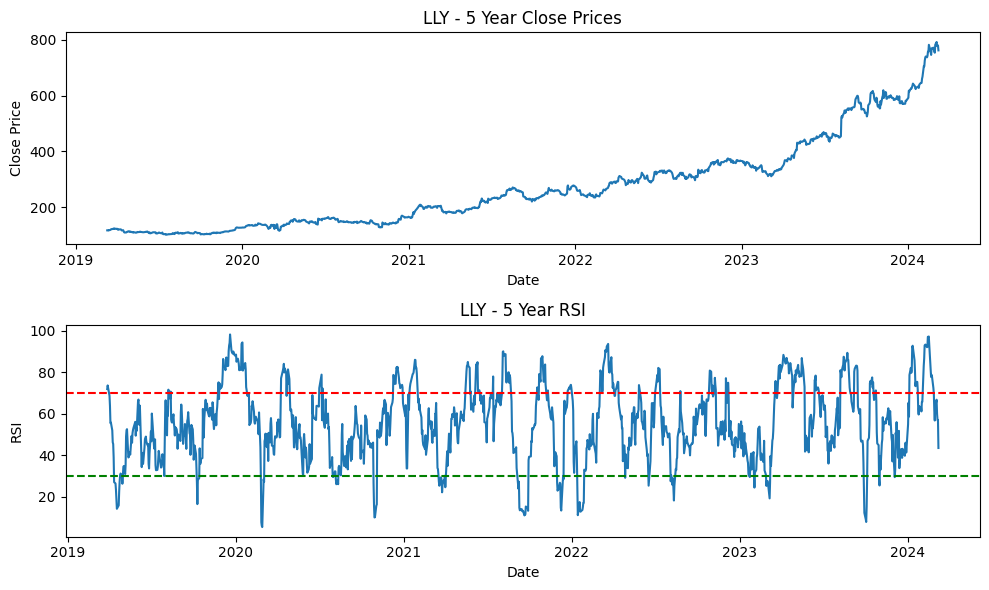

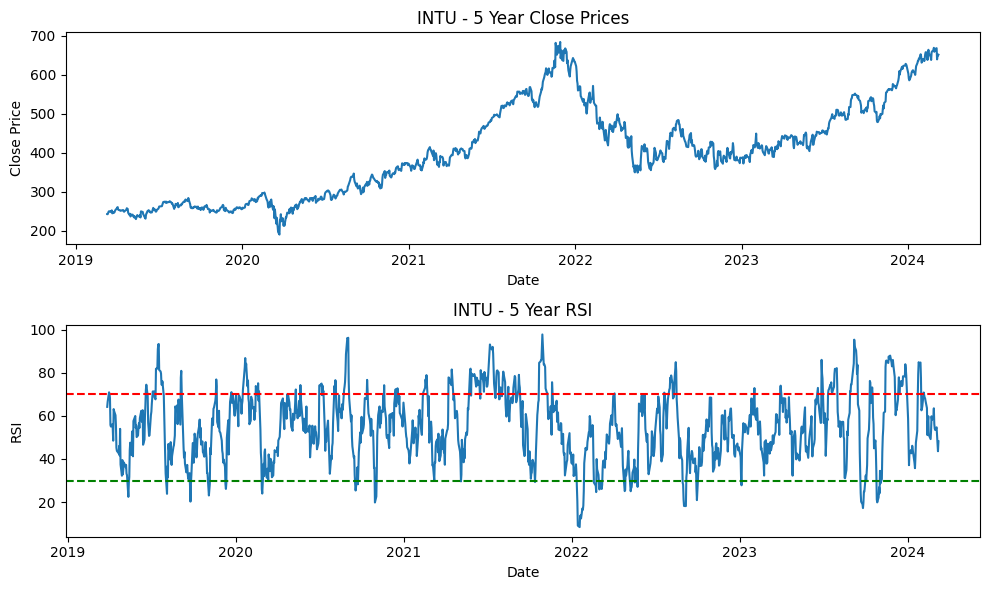

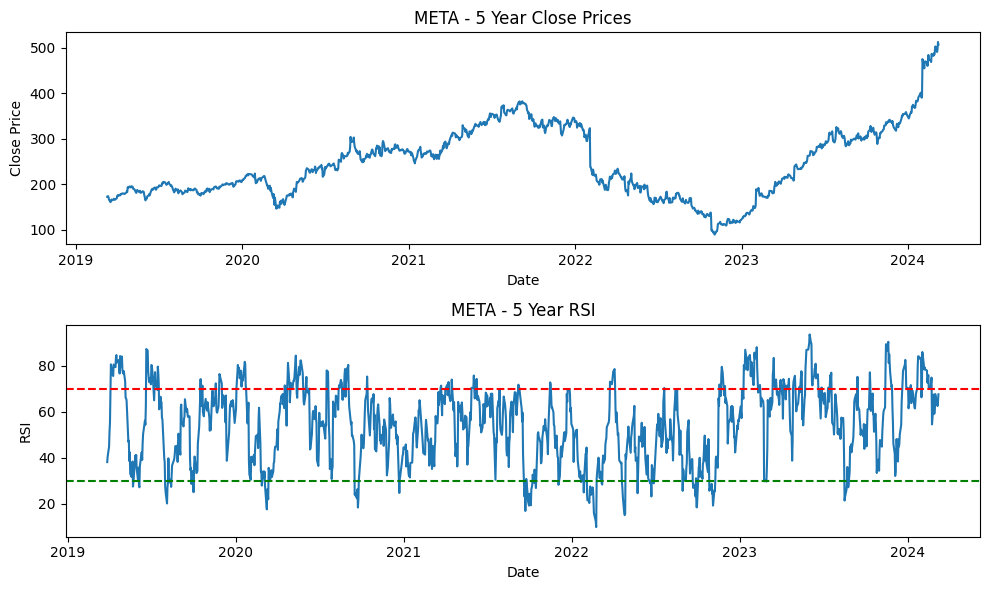

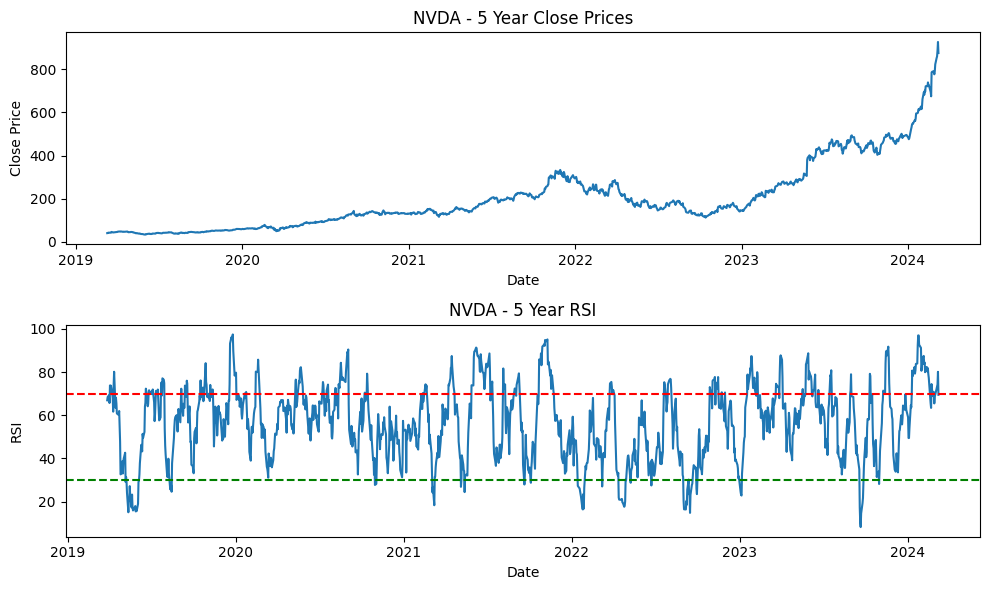

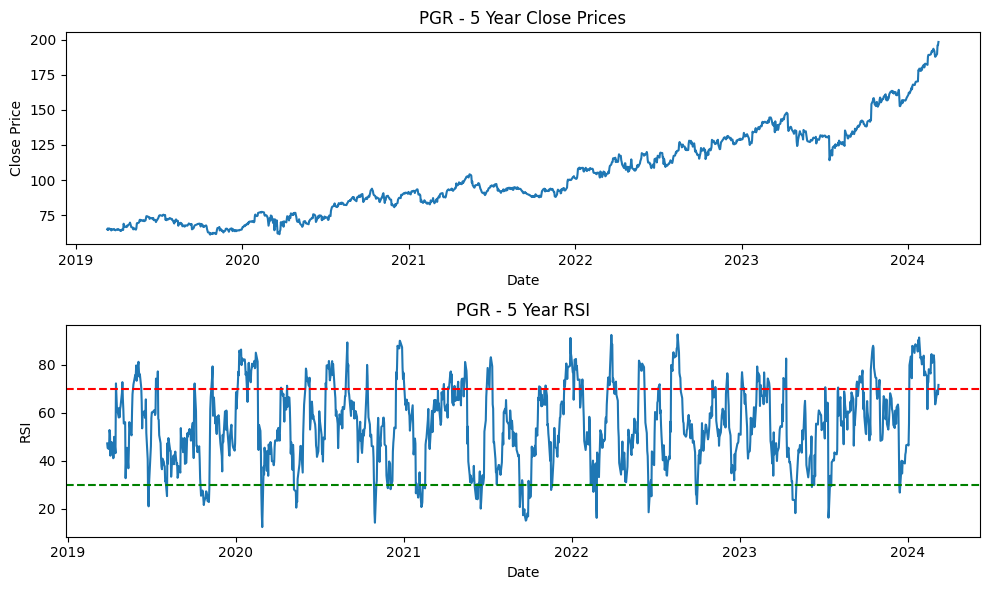

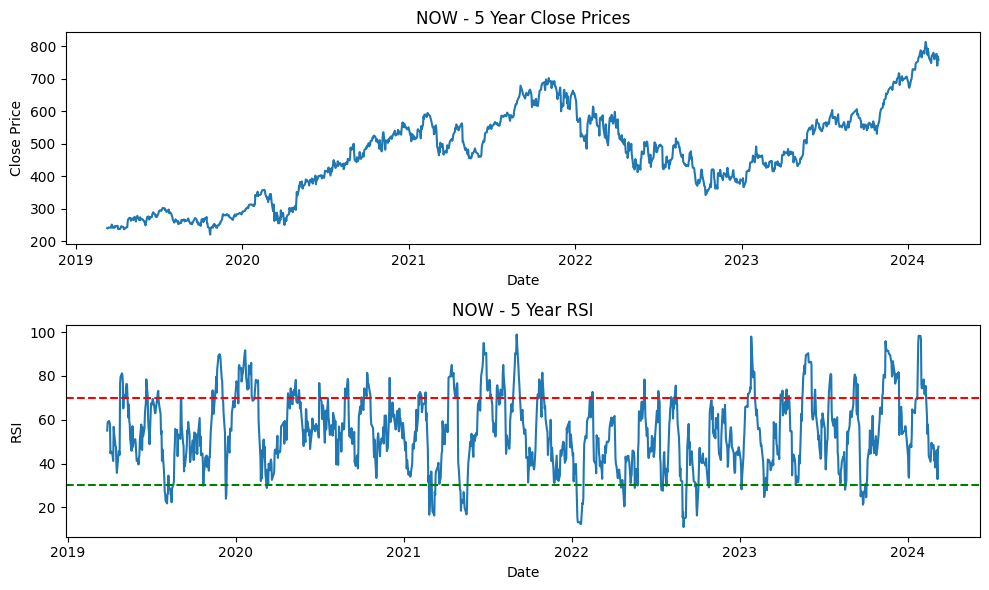

In [31]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_rsi(data, period=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()

    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

def plot_stock_charts(stock_data):
    for ticker, data in stock_data.items():
        plt.figure(figsize=(10, 6))
        plt.subplot(2, 1, 1)
        plt.plot(data['Historical Data']['Close'])
        plt.title(f'{ticker} - 5 Year Close Prices')
        plt.xlabel('Date')
        plt.ylabel('Close Price')

        rsi = calculate_rsi(data['Historical Data'])
        plt.subplot(2, 1, 2)
        plt.plot(rsi)
        plt.title(f'{ticker} - 5 Year RSI')
        plt.xlabel('Date')
        plt.ylabel('RSI')
        plt.axhline(70, linestyle='--', color='red')
        plt.axhline(30, linestyle='--', color='green')

        plt.tight_layout()
        plt.show()

plot_stock_charts(stock_data)


In [33]:
!pip install plotly

In [34]:
def calculate_sma(data, window):
    return data['Close'].rolling(window=window).mean()

def calculate_rsi(data, period=14):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()

    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi.fillna(0)

def add_technical_indicators(stock_data):
    for ticker, data in stock_data.items():
        hist = data['Historical Data']
        data['SMA50'] = calculate_sma(hist, 50)
        data['SMA200'] = calculate_sma(hist, 200)
        data['RSI'] = calculate_rsi(hist['Close'])
    return stock_data


In [36]:
stock_data

{'LLY': {'Open': 780.0,
  'High': 780.0,
  'Low': 755.0,
  'Close': 762.1400146484375,
  'Volume': 4042900,
  'Historical Data':                                  Open        High         Low       Close  \
  Date                                                                        
  2019-03-11 00:00:00-04:00  116.114336  118.109460  115.840123  116.776222   
  2019-03-12 00:00:00-04:00  116.776222  117.267908  116.000866  116.776222   
  2019-03-13 00:00:00-04:00  117.816326  123.631500  116.454730  117.542114   
  2019-03-14 00:00:00-04:00  118.175648  118.175648  115.840122  116.379089   
  2019-03-15 00:00:00-04:00  116.397997  117.400292  115.320063  117.192268   
  ...                               ...         ...         ...         ...   
  2024-03-04 00:00:00-05:00  796.440002  800.780029  786.159973  792.280029   
  2024-03-05 00:00:00-05:00  785.309998  788.530029  769.280029  777.590027   
  2024-03-06 00:00:00-05:00  784.289978  787.849976  774.000000  779.770020   
  20

In [53]:
import plotly.graph_objects as go

def plot_with_plotly(stock_data):
    for ticker, data in stock_data.items():
        fig = go.Figure()

        # Adding Close price
        fig.add_trace(go.Scatter(x=data['Historical Data'].index, y=data['Historical Data']['Close'], name='Close', line=dict(color='blue')))

        # Adding SMA50 and SMA200
        fig.add_trace(go.Scatter(x=data['Historical Data'].index, y=data['SMA50'], name='SMA50', line=dict(color='orange')))
        fig.add_trace(go.Scatter(x=data['Historical Data'].index, y=data['SMA200'], name='SMA200', line=dict(color='green')))

        # Updating layout for better visualization
        fig.update_layout(title=f'{ticker} - Close, SMA50, and SMA200', xaxis_title='Date', yaxis_title='Price', template="plotly_dark")
        fig.show()

        # Plot RSI
        fig_rsi = go.Figure()
        fig_rsi.add_trace(go.Scatter(x=data['Historical Data'].index, y=data['RSI'], name='RSI', line=dict(color='purple')))
        fig_rsi.add_hline(y=70, line_dash="dot", line_color="red", annotation_text="Overbought")
        fig_rsi.add_hline(y=30, line_dash="dot", line_color="green", annotation_text="Oversold")
        fig_rsi.update_layout(title=f'{ticker} - RSI (14-day)', xaxis_title='Date', yaxis_title='RSI', template="plotly_dark")
        fig_rsi.show()




In [54]:
def print_overbought_oversold(stock_data):
    status_data = {'Ticker': [], 'Status': []}
    for ticker, data in stock_data.items():
        current_rsi = data['RSI'].iloc[-1]
        if current_rsi > 70:
            status = 'Overbought'
        elif current_rsi < 30:
            status = 'Oversold'
        else:
            status = 'Neutral'

        status_data['Ticker'].append(ticker)
        status_data['Status'].append(status)

    status_df = pd.DataFrame(status_data)
    return status_df

# Assuming stock_data is already filled with the necessary data
stock_data = add_technical_indicators(stock_data)
plot_with_plotly(stock_data)
status_df = print_overbought_oversold(stock_data)
print(status_df)


  Ticker      Status
0    LLY     Neutral
1   INTU     Neutral
2   META     Neutral
3   NVDA     Neutral
4    PGR  Overbought
5    NOW     Neutral


In [48]:
def fetch_detailed_data_with_sector(screened_stocks):
    stock_data = {}
    for ticker in screened_stocks:
        stock = yf.Ticker(ticker)
        hist = stock.history(period="5y")  # Fetching 5 years of data
        info = stock.info  # Fetch additional info

        stock_data[ticker] = {
            'Sector': info.get('sector', 'N/A'),  # Some stocks might not have this info
            'Open': hist['Open'].iloc[-1],
            'Close': hist['Close'].iloc[-1],
            'High': hist['High'].iloc[-1],
            'Low': hist['Low'].iloc[-1],
            'Volume': hist['Volume'].iloc[-1],
            'Historical Data': hist,
            # Add technical indicators as before
        }
    return stock_data


In [47]:
def create_metrics_table_with_sector(stock_data):
    data_for_table = {
        'Ticker': [],
        'Sector': [],
        # Include other metrics as before
    }

    for ticker, data in stock_data.items():
        data_for_table['Ticker'].append(ticker)
        data_for_table['Sector'].append(data['Sector'])
        # Add data for other metrics

    return pd.DataFrame(data_for_table)

# After fetching data
stock_data = fetch_detailed_data_with_sector(screened_stocks)
metrics_table = create_metrics_table_with_sector(stock_data)
print(metrics_table)


  Ticker                  Sector
0    LLY              Healthcare
1   INTU              Technology
2   META  Communication Services
3   NVDA              Technology
4    PGR      Financial Services
5    NOW              Technology


In [46]:
def find_support_resistance(data):
    # Simplified approach: find min and max in the last year
    recent_data = data.tail(252)  # Approx. number of trading days in a year
    support = recent_data['Low'].min()
    resistance = recent_data['High'].max()
    return support, resistance


In [55]:
def plot_with_plotly_support_resistance(stock_data):
    for ticker, data in stock_data.items():
        support, resistance = find_support_resistance(data['Historical Data'])

        fig = go.Figure()
        # Adding Close price
        fig.add_trace(go.Scatter(x=data['Historical Data'].index, y=data['Historical Data']['Close'], name='Close', line=dict(color='blue')))



        # Add Support and Resistance
        fig.add_hline(y=support, line_dash="dot", annotation_text="Support", line_color="green")
        fig.add_hline(y=resistance, line_dash="dot", annotation_text="Resistance", line_color="red")

        fig.update_layout(title=f'{ticker} - Technical Indicators with Support and Resistance', template="plotly_dark")
        fig.show()


In [62]:

def plot_with_plotly_support_resistance(stock_data):
    for ticker, data in stock_data.items():
        fig = go.Figure()
        fig.add_trace(go.Scatter(x=data['Historical Data'].index, y=data['Historical Data']['Close'], name='Close', line=dict(color='blue')))
        fig.add_trace(go.Scatter(x=data['Historical Data'].index, y=data['SMA50'], name='SMA50', line=dict(color='orange')))
        fig.add_trace(go.Scatter(x=data['Historical Data'].index, y=data['SMA200'], name='SMA200', line=dict(color='green')))


        # Adding support and resistance lines
        fig.add_hline(y=data['Support'], line_dash="dot", annotation_text="Support", line_color="green")
        fig.add_hline(y=data['Resistance'], line_dash="dot", annotation_text="Resistance", line_color="red")

        # Updating layout for better visualization
        fig.update_layout(
            title=f'{ticker} - Close, SMA50, SMA200, and RSI with Support and Resistance',
            xaxis_title='Date',
            yaxis_title='Price',
            template="plotly_dark",
            yaxis=dict(side="left"),

        )
        fig.show()



screened_stocks = ['LLY', 'INTU', 'META', 'NVDA', 'PGR', 'NOW']  # Replace with your screened stocks list
stock_data = fetch_detailed_data_with_sector(screened_stocks)
stock_data = add_technical_indicators(stock_data)
plot_with_plotly_support_resistance(stock_data)


In [70]:
import yfinance as yf
import pandas as pd

# Assuming metrics_table is already defined as shown in your example
tickers = metrics_table['Ticker'].tolist()

# Fetching additional data
def fetch_additional_data(tickers):
    data = []
    for ticker in tickers:
        stock = yf.Ticker(ticker)
        hist = stock.history(period="1y")
        last_price = hist.iloc[-1]['Close']
        year_ago_price = hist.iloc[0]['Close']
        percentage_change = ((last_price - year_ago_price) / year_ago_price) * 100
        data.append({
            'Ticker': ticker,
            'Company Name': stock.info['shortName'],
            'Sector': stock.info['sector'],
            'Percentage Change': percentage_change
        })
    return pd.DataFrame(data)

# Fetch additional data
additional_data = fetch_additional_data(tickers)


In [71]:
final_data = additional_data

In [72]:
import plotly.express as px

fig = px.bar(final_data, x='Company Name', y='Percentage Change', color='Sector',
             title='Stock Performance by Sector for Companies with P/E Ratio > 20, Significant Market Cap, and Revenue Growth',
             labels={'Percentage Change': 'Percentage Change in Stock Price', 'Company Name': 'Company Name'})
fig.update_layout(xaxis={'categoryorder':'total descending'}, xaxis_title="Company", yaxis_title="Percentage Change in Stock Price (%)", template="plotly_dark")
fig.show()


In [81]:
import yfinance as yf

def fetch_financial_statements(ticker):
    stock = yf.Ticker(ticker)
    info = stock.info
    balance_sheet = stock.balance_sheet
    financials = stock.financials
    cashflow = stock.cashflow

    data = {
        'info': info,
        'balance_sheet': balance_sheet,
        'financials': financials,
        'cashflow': cashflow
    }
    return data


In [82]:
def list_headings(financial_statements):
    headings = {
        'balance_sheet': financial_statements['balance_sheet'].index.tolist(),
        'income_statement': financial_statements['income_statement'].index.tolist(),
        'cash_flow': financial_statements['cash_flow'].index.tolist()
    }
    return headings


In [83]:
print(list_headings)

<function list_headings at 0x7ce922b0e9e0>


In [84]:
def extract_metric(income_statement, possible_headings):
    for heading in possible_headings:
        if heading in income_statement.index:
            return income_statement.loc[heading]
    return None

# Example usage
gross_margin_headings = ['Gross Profit', 'Gross Margin']
gross_margin = extract_metric(financial_statements['income_statement'], gross_margin_headings)



NameError: name 'financial_statements' is not defined

In [88]:
def calculate_healthcare_metrics(data):
    gross_margin = (data['info']['grossMargins'] * 100)  # Convert to percentage
    #rd_spending = data['financials'].loc['Research Development'].iloc[0]  # Latest R&D spending

    return {
        'Gross Margin (%)': gross_margin,
        #'R&D Spending': rd_spending
    }


In [94]:
def calculate_technology_metrics(data):
    revenue_growth = (data['info']['revenueGrowth'] * 100)  # Convert to percentage
    operating_margin = (data['info']['operatingMargins'] * 100)  # Convert to percentage
    total_revenue = (data['info']['Total Revenue'])

    return {
        'Revenue Growth (%)': revenue_growth,
        'Operating Margin (%)': operating_margin
        'Total Revenue': total_revenue
    }


SyntaxError: invalid syntax (<ipython-input-94-3c041ea1e165>, line 9)

In [91]:
def calculate_margins(income_statement):
    total_revenue = income_statement.loc['Total Revenue'].iloc[0]
    cost_of_revenue = income_statement.loc['Cost of Revenue'].iloc[0]
    net_income = income_statement.loc['Net Income'].iloc[0]

    gross_margin = ((total_revenue - cost_of_revenue) / total_revenue) * 100
    net_margin = (net_income / total_revenue) * 100

    return gross_margin, net_margin


In [90]:
import pandas as pd

# Assuming 'screened_stocks' is a list of ticker symbols and 'metrics_table' includes their sectors
def collect_metrics(screened_stocks, metrics_table):
    metrics_list = []
    for ticker in screened_stocks:
        data = fetch_financial_data(ticker)
        sector = metrics_table.loc[metrics_table['Ticker'] == ticker, 'Sector'].values[0]

        if sector == 'Healthcare':
            metrics = calculate_healthcare_metrics(data)
        elif sector == 'Technology':
            metrics = calculate_technology_metrics(data)
        # Add more 'elif' conditions for other sectors
        else:
            metrics = {}

        metrics['Ticker'] = ticker
        metrics['Sector'] = sector
        metrics_list.append(metrics)

    return pd.DataFrame(metrics_list)

final_metrics_table = collect_metrics(screened_stocks, metrics_table)
final_metrics_table


,Gross Margin (%),Ticker,Sector,Revenue Growth (%),Operating Margin (%)
0,79.246,LLY,Healthcare,NaN,NaN
1,NaN,INTU,Technology,41.0,15.697000
2,NaN,META,Communication Services,NaN,NaN
3,NaN,NVDA,Technology,265.3,61.592996
4,NaN,PGR,Financial Services,NaN,NaN
5,NaN,NOW,Technology,25.6,11.079001
